In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
283664,561795,21238,RED RETROSPOT CUP,8,2011-07-29 13:28:00,0.85,12716.0,France
76339,542624,21157,RED RETROSPOT WASHBAG,1,2011-01-31 09:48:00,4.13,NaN,United Kingdom
423144,573137,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2011-10-27 17:15:00,10.79,NaN,United Kingdom
76676,C542635,21212,PACK OF 72 RETROSPOT CAKE CASES,-2,2011-01-31 10:43:00,0.42,14688.0,United Kingdom
44464,540178,20973,12 PENCIL SMALL TUBE WOODLAND,24,2011-01-05 12:42:00,0.65,12681.0,France
217950,555947,47021G,SET/6 BEAD COASTERS GAUZE BAG GOLD,34,2011-06-08 10:45:00,0.39,14911.0,EIRE
152106,549577,22391,PAPERWEIGHT HOME SWEET HOME,6,2011-04-11 08:16:00,2.55,14286.0,United Kingdom
20229,538015,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,3,2010-12-09 12:49:00,3.25,13240.0,United Kingdom
323311,565287,22867,HAND WARMER BIRD DESIGN,12,2011-09-02 11:42:00,2.10,12483.0,Sweden
111659,545812,21224,SET/4 SKULL BADGES,10,2011-03-07 12:26:00,1.25,14214.0,United Kingdom


# 2. Exploring and Cleaning the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### 1. Check if there are any missing value

In [6]:
df.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

Text(0.5, 1.0, 'Ration of missing value')

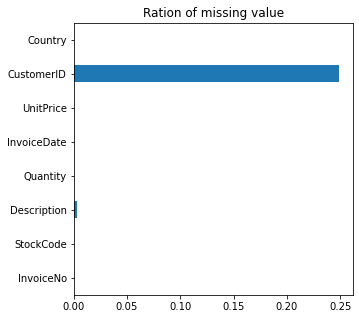

In [7]:
plt.figure(figsize = (5, 5)) 
df.isnull().mean(axis=0).plot.barh()
plt.title("Ration of missing value")

##### The missing values are only in the CustomerID column and the description column

#### 2. Check if any column have a single value

In [8]:
print(df.nunique())

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


##### There are no single value in datasets

#### 3. Check if there are any missing value

In [9]:
duplicateRowsDF = df[df.duplicated()]

In [10]:
print("Duplicate Rows based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows based on all columns are :
       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID        

##### There are 5268 duplicated coloumns

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


#### Drop customer id since it not necessary for clustering and it contains many missing value

In [13]:
null_data = df[df['Description'].isnull()]
null_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [14]:
df['InvoiceNo']

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 536641, dtype: object

#### Removing cancelled orders

In [15]:
x = df['InvoiceNo'].str.contains('C')
x.fillna(0, inplace=True)

In [16]:
x = x.astype(int)

In [17]:
x.value_counts()

0    527390
1      9251
Name: InvoiceNo, dtype: int64

In [18]:
df['order_canceled'] = x
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
43827,540148,16161U,WRAP SUKI AND FRIENDS,25,2011-01-05 10:58:00,0.42,14189.0,United Kingdom,0
83483,543306,22748,POPPY'S PLAYHOUSE KITCHEN,1,2011-02-07 11:56:00,2.10,16686.0,United Kingdom,0
462966,576051,20677,PINK POLKADOT BOWL,8,2011-11-13 14:45:00,1.25,14911.0,EIRE,0
451093,575177,84997C,CHILDRENS CUTLERY POLKADOT BLUE,1,2011-11-08 18:41:00,8.29,NaN,United Kingdom,0
198488,554054,21096,SET/6 FRUIT SALAD PAPER PLATES,6,2011-05-20 15:29:00,0.83,NaN,United Kingdom,0
147043,549047,22939,APRON APPLE DELIGHT,1,2011-04-06 10:07:00,4.95,17783.0,United Kingdom,0
386390,570232,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,1,2011-10-09 13:58:00,2.08,14040.0,United Kingdom,0
478263,577078,21934,SKULL SHOULDER BAG,13,2011-11-17 15:17:00,1.63,NaN,United Kingdom,0
342447,566866,23412,HEART MIRROR ANTIQUE WHITE,16,2011-09-15 12:55:00,6.65,13694.0,United Kingdom,0
311026,564221,22961,JAM MAKING SET PRINTED,3,2011-08-24 09:36:00,3.29,NaN,United Kingdom,0


In [19]:
df['order_canceled'].value_counts()

0    527390
1      9251
Name: order_canceled, dtype: int64

In [20]:
n1 = df['order_canceled'].value_counts()[1]
n2 = len(df.index)
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))


Number of orders canceled: 9251/536641 (1.72%) 


In [21]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0


In [22]:
df = df.loc[df['order_canceled'] == 0,:]

In [23]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0


In [24]:
df.reset_index(drop=True,inplace=True)

#### Checking if it has negative quantities.

In [25]:
len(df.loc[df['Quantity'] < 0,:])

1336

In [26]:
df.loc[df['Quantity'] < 0,:]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
2336,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom,0
4249,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom,0
7003,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,0
7004,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,0
7005,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
520928,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom,0
520930,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom,0
520931,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom,0
522503,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom,0


In [27]:
df = df[df['CustomerID'].notna()]

In [28]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
527385,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0
527386,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0
527387,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0
527388,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0


In [29]:
df.isnull().any()

InvoiceNo         False
StockCode         False
Description       False
Quantity          False
InvoiceDate       False
UnitPrice         False
CustomerID        False
Country           False
order_canceled    False
dtype: bool

In [30]:
df.reset_index(drop=True,inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392732 entries, 0 to 392731
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       392732 non-null  object        
 1   StockCode       392732 non-null  object        
 2   Description     392732 non-null  object        
 3   Quantity        392732 non-null  int64         
 4   InvoiceDate     392732 non-null  datetime64[ns]
 5   UnitPrice       392732 non-null  float64       
 6   CustomerID      392732 non-null  float64       
 7   Country         392732 non-null  object        
 8   order_canceled  392732 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 25.5+ MB


# 3. Exploratory Data

## 3.1 Countries

In [32]:
df.Country.nunique()

37

In [35]:
customer_country=df[['Country','CustomerID']].drop_duplicates()
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
35,United Kingdom,3921
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,14
12,Finland,12
1,Austria,11


In [103]:
n1 = df[df['Country'] == 'United Kingdom'].value_counts('Country').sum()
n2 = len(df['Country'])
n1
print('Number of customers from UK: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of customers from UK: 349227/392732 (88.92%) 


In [82]:
temp = df.groupby(['Country'],as_index=False).agg({'InvoiceNo':'nunique'}).rename(columns = {'InvoiceNo':'Orders'})
total = temp['Orders'].sum(axis=0)
temp['%Orders'] = round((temp['Orders']/total)*100,4)

In [83]:
temp.sort_values(by=['%Orders'],ascending=False,inplace=True)
temp.reset_index(drop=True,inplace=True)

Text(0, 0.5, '%Orders')

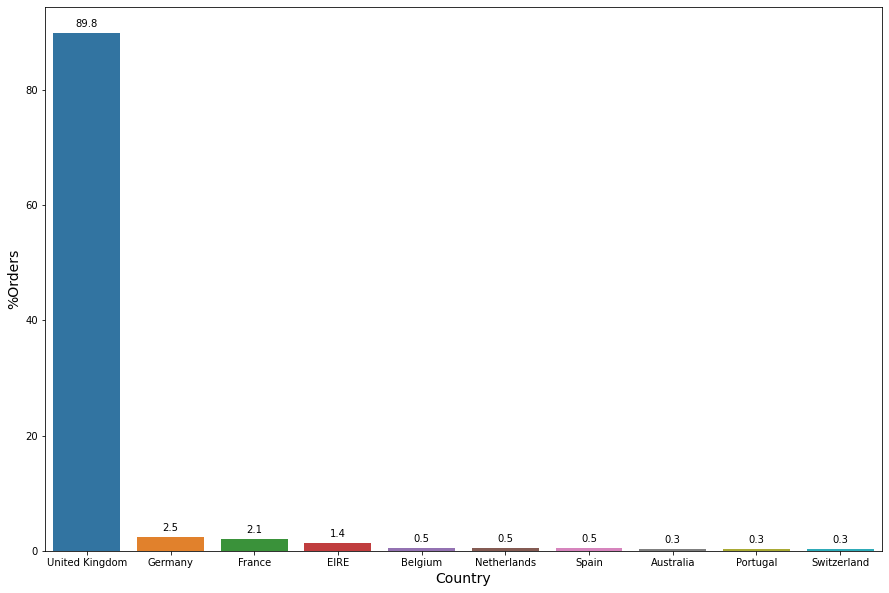

In [102]:
plt.figure(figsize=(15,10))
splot=sns.barplot(x="Country",y="%Orders",data=temp[:10])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Country", size=14)
plt.ylabel("%Orders", size=14)

##### Almost 90% of the data is coming from UK !

## 3.2 Quantity

In [90]:
df['Quantity'].describe()

count    392732.000000
mean         13.153718
std         181.588420
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [81]:
df[(df['Quantity']<0)].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled


## 3.3 Stock Code